# 피의자, 피해자 데이터 생성
## 시+나이 별

In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import os
import glob
folders_1 = os.listdir('data/금융사기용의자의 연령대별 지역데이터')
folders_2 = os.listdir('data/금융사기피해자의 연령대별 지역데이터')

def make_csv(folders,folderpath):
    with open(folderpath[:-1]+'.csv', 'w',encoding='UTF-8') as outfile:
        for filename in folders:
            with open(folderpath+filename, encoding='UTF-8') as file:        
                outfile.write(file.read())


make_csv(folders_1,"data/금융사기용의자의 연령대별 지역데이터/")
df_suspect_origin = pd.read_csv('./data/금융사기용의자의 연령대별 지역데이터.csv',names=['고유번호', '생년구간', '광역시도명', '법정시군구명', '등록일시'],index_col=0)
make_csv(folders_2,'data/금융사기피해자의 연령대별 지역데이터/')
df_victim_origin = pd.read_csv('./data/금융사기피해자의 연령대별 지역데이터.csv',names=['고유번호', '생년구간', '광역시도명', '법정시군구명', '등록일시'],index_col=0)

In [4]:
df_suspect_origin = pd.read_csv('./data/금융사기용의자의 연령대별 지역데이터.csv',names=['고유번호', '생년구간', '광역시도명', '법정시군구명', '등록일시'],index_col=0)
df_victim_origin = pd.read_csv('./data/금융사기피해자의 연령대별 지역데이터.csv',names=['고유번호', '생년구간', '광역시도명', '법정시군구명', '등록일시'],index_col=0)
## 지역별 시구군
seoul = '종로구 중구 용산구 성동구 광진구 동대문구 중랑구 성북구 강북구 도봉구 노원구 은평구 서대문구 마포구 양천구 강서구 구로구 금천구 영등포구 동작구 관악구 서초구 강남구 송파구 강동구'.split(' ')
busan = '중구 서구 동구 영도구 부산진구 동래구 남구 북구 강서구 해운대구 사하구 금정구 연제구 수영구 사상구 기장군'.split(' ')
daegu = '중구 동구 서구 남구 북구 수성구 달서구 달성군'.split(' ')
incheon = '중구 동구 미추홀구 연수구 남동구 부평구 계양구 서구 강화군 옹진군'.split(' ')
gwangju = '동구 서구 남구 북구 광산구'.split(' ')
daejun = '동구 중구 서구 유성구 대덕구'.split(' ')
ulsan = '중구 남구 동구 북구 울주군'.split(' ')
gg = '남양주시 수원시 성남시 의정부시 안양시 부천시 광명시 동두천시 평택시 안산시 고양시 과천시 구리시 오산시 시흥시 군포시 의왕시 하남시 용인시 파주시 이천시 안성시 김포시 화성시 광주시 양주시 포천시 여주시 연천군 가평군 양평군'.split(' ')
gangwon = '춘천시 원주시 강릉시 동해시 태백시 속초시 삼척시 홍천군 횡성군 영월군 평창군 정선군 철원군 화천군 양구군 인제군 고성군 양양군'.split(' ')
chungbuk='청주시 충주시 제천시 보은군 옥천군 영동군 증평군 진천군 괴산군 음성군 단양군'.split(' ')
chungnam='천안시 공주시 보령시 아산시 서산시 논산시 계룡시 당진시 금산군 부여군 서천군 청양군 홍성군 예산군 태안군'.split(' ')
jeonbuk='전주시 군산시 익산시 정읍시 남원시 김제시 완주군 진안군 무주군 장수군 임실군 순창군 고창군 부안군'.split(' ')
jeonnam='목포시 여수시 순천시 나주시 광양시 담양군 곡성군 구례군 고흥군 보성군 화순군 장흥군 강진군 해남군 영암군 무안군 함평군 영광군 장성군 완도군 진도군 신안군'.split(' ')
geonbuk='포항시 경주시 김천시 안동시 구미시 영주시 영천시 상주시 문경시 경산시 군위군 의성군 청송군 영양군 영덕군 청도군 고령군 성주군 칠곡군 예천군 봉화군 울진군 울릉군'.split(' ')
geonnam ='창원시 진주시 통영시 사천시 김해시 밀양시 거제시 양산시 의령군 함안군 창녕군 고성군 남해군 하동군 산청군 함양군 거창군 합천군'.split(' ')
jeju='제주시 서귀포시'.split(' ')
sejong = '세종시'.split(' ')
all_region = seoul+ busan +daegu +incheon+gwangju+daejun+ulsan+gg+gangwon+chungbuk+chungnam+jeonbuk+jeonnam+geonbuk+geonnam+jeju+sejong
part = gg+gangwon+chungbuk+chungnam+jeonbuk+jeonnam+geonbuk+geonnam+jeju
def delete_detail_region(region):
    region = str(region)
    if len(region) > 4:
        region=region[0:3]
        for i in all_region:
            if i in region:
                return i
            else:
                return region
    else:
        return region

df_suspect_origin['법정시군구명']=df_suspect_origin['법정시군구명'].apply(lambda x: delete_detail_region(x))
df_victim_origin['법정시군구명']=df_victim_origin['법정시군구명'].apply(lambda x: delete_detail_region(x))

a = list(df_victim_origin['생년구간'].unique()) #2090-2100 2070-2080 => 각각 1개 5개 제외
a.remove ('2090-2100')
a.remove('2070-2080')
a= sorted(a)


b = list(df_suspect_origin['생년구간'].unique()) # 2080-2090 => 1개 제외
b.remove('2080-2090')
b = sorted(b)

region_s = [seoul,busan,daegu,incheon,gwangju,daejun,ulsan,gg ,gangwon ,chungbuk,chungnam,jeonbuk,jeonnam,geonbuk,geonnam ,jeju, sejong]
region_b = ['서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도','세종특별자치시']
region = []
DF = []
for b in range(17):
    for s in region_s[b]:
        DF.append ([region_b[b],s])
        for old in a: # a로 들어가야 전부 들어감
            region.append([region_b[b],s,old])

#DF = pd.DataFrame(columns=['광역시도명','법정시군구명'], data=DF)
#suspect_DF = DF
#victim_DF = DF

DF = pd.DataFrame(columns=['광역시도명','법정시군구명'], data=DF)                   

suspect_Old_DF = pd.DataFrame(columns=['광역시도명','법정시군구명','생년구간'], data=region)
victim_Old_DF = pd.DataFrame(columns=['광역시도명','법정시군구명','생년구간'], data=region)
suspect_Old_DF.to_csv("suspect_Old_DF.csv", mode='w')
victim_Old_DF.to_csv("victim_Old_DF.csv", mode='w')


def return_cnt(df,row):
    temp = df[(df['광역시도명']==row['광역시도명'])&(df['법정시군구명']==row['법정시군구명'])&(df['생년구간']==row['생년구간'])]
    return temp['광역시도명'].count()

suspect_Old_DF['발생건수'] = suspect_Old_DF.apply(lambda x: return_cnt(df_suspect_origin,x),axis=1)
victim_Old_DF['발생건수'] = victim_Old_DF.apply(lambda x: return_cnt(df_victim_origin,x),axis=1)
suspect_Old_DF.to_csv("suspect_Old_DF.csv", mode='w')
victim_Old_DF.to_csv("victim_Old_DF.csv", mode='w')

# 준비과정 1
## 함수 (makecity, makecity2)
## 서울, 부산, 대구, 인천, 광주, 대전, 울산 자르기
## 자르고 광역시도명	법정시군구명으로 구분

In [14]:
def makecity(row):
    if '서울' in row: 
        return '서울특별시'
    elif '부산' in row:
        return '부산광역시'
    elif '대구' in row:
        return '대구광역시'
    elif '인천' in row:
        return '인천광역시'
    elif '광주' in row:
        return '광주광역시'   
    elif '대전' in row:
        return '대전광역시'        
    elif '울산' in row:
        return '울산광역시'
    else:
        return row
def makecity2(row):
    if '서울' in row: 
        temp=row.replace('서울','')
        return temp.strip()
    elif '부산' in row:
        temp=row.replace('부산','')
        return temp.strip()
    elif '대구' in row:
        temp=row.replace('대구','')
        return temp.strip()
    elif '인천' in row:
        temp=row.replace('인천','')
        return temp.strip()
    elif '광주' in row:
        temp=row.replace('광주','')
        return temp.strip()   
    elif '대전' in row:
        temp=row.replace('대전','')
        return temp.strip()        
    elif '울산' in row:
        temp=row.replace('울산','')
        return temp.strip()
    else:
        return row

# 준비과정2
## 생년구간과의 match만약 생년월일을 나이로 바꾸었을때
## 만나이는 계산불가능 따라서 일반 나이를 따름
## 2023년 기준으로
## 1. 13~22
## 2. 23~32 이런식으로 나이가 바뀜

## 따라서 칼럼을 이어붙이는 기준에서 걸침
## ex> 23 ~ 32는 15 ~ 29에도 포함되고 30 ~ 49에도 포함됨, 따라서 그 나이구간의 중앙값을 그 나이라고 가정하고 컬럼을 이어붙인다. 

In [15]:
def cut1(row):
    return 2023-int(row[0:4])+5

In [16]:
suspect_Old_DF['생년구간new']=suspect_Old_DF['생년구간'].apply(cut1)
victim_Old_DF['생년구간new']=victim_Old_DF['생년구간'].apply(cut1)

In [17]:
suspect_Old_DF

,광역시도명,법정시군구명,생년구간,발생건수,생년구간new
0,서울특별시,종로구,1900-1910,0,128
1,서울특별시,종로구,1910-1920,0,118
2,서울특별시,종로구,1920-1930,0,108
3,서울특별시,종로구,1930-1940,0,98
4,서울특별시,종로구,1940-1950,1,88
...,...,...,...,...,...
2743,세종특별자치시,세종시,1970-1980,0,58
2744,세종특별자치시,세종시,1980-1990,0,48
2745,세종특별자치시,세종시,1990-2000,0,38
2746,세종특별자치시,세종시,2000-2010,0,28


In [18]:
victim_Old_DF

,광역시도명,법정시군구명,생년구간,발생건수,생년구간new
0,서울특별시,종로구,1900-1910,0,128
1,서울특별시,종로구,1910-1920,0,118
2,서울특별시,종로구,1920-1930,0,108
3,서울특별시,종로구,1930-1940,0,98
4,서울특별시,종로구,1940-1950,1,88
...,...,...,...,...,...
2743,세종특별자치시,세종시,1970-1980,0,58
2744,세종특별자치시,세종시,1980-1990,0,48
2745,세종특별자치시,세종시,1990-2000,0,38
2746,세종특별자치시,세종시,2000-2010,0,28


# 세종시 제거
## 피의자 피해자 모두 세종시는 발생건수가 0임

In [19]:
suspect_Old_DF=suspect_Old_DF[suspect_Old_DF['법정시군구명']!='세종시']
victim_Old_DF=victim_Old_DF[victim_Old_DF['법정시군구명']!='세종시']

In [20]:
suspect_Old_DF

,광역시도명,법정시군구명,생년구간,발생건수,생년구간new
0,서울특별시,종로구,1900-1910,0,128
1,서울특별시,종로구,1910-1920,0,118
2,서울특별시,종로구,1920-1930,0,108
3,서울특별시,종로구,1930-1940,0,98
4,서울특별시,종로구,1940-1950,1,88
...,...,...,...,...,...
2731,제주특별자치도,서귀포시,1970-1980,6,58
2732,제주특별자치도,서귀포시,1980-1990,7,48
2733,제주특별자치도,서귀포시,1990-2000,26,38
2734,제주특별자치도,서귀포시,2000-2010,29,28


In [21]:
victim_Old_DF

,광역시도명,법정시군구명,생년구간,발생건수,생년구간new
0,서울특별시,종로구,1900-1910,0,128
1,서울특별시,종로구,1910-1920,0,118
2,서울특별시,종로구,1920-1930,0,108
3,서울특별시,종로구,1930-1940,0,98
4,서울특별시,종로구,1940-1950,1,88
...,...,...,...,...,...
2731,제주특별자치도,서귀포시,1970-1980,40,58
2732,제주특별자치도,서귀포시,1980-1990,103,48
2733,제주특별자치도,서귀포시,1990-2000,157,38
2734,제주특별자치도,서귀포시,2000-2010,205,28


# 1. 등록된 외국인(합법) : 2021년

In [22]:
le_foreign=pd.read_csv('데이터/시+나이/시군구별_및_연령별_등록외국인_현황_20230508231307(2021).csv',encoding='cp949')

In [23]:
le_foreign.iloc[3:,]

,행정구역(시군구)별(1),성별(1),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12,2021.13,2021.14,2021.15,2021.16,2021.17
3,총계,여자,483425,14864,13526,8400,11826,68497,64907,63961,54312,38671,33684,39190,44173,16773,6596,2244,790,1011
4,서울특별시,계,226569,5506,6051,4161,6309,35097,28422,23824,21095,16343,15710,20315,25459,10308,4776,1768,656,769
5,서울특별시,남자,103937,2804,3077,2144,2384,11482,10913,11150,10884,8627,8321,10275,12564,5087,2496,1013,363,353
6,서울특별시,여자,122632,2702,2974,2017,3925,23615,17509,12674,10211,7716,7389,10040,12895,5221,2280,755,293,416
7,부산광역시,계,39420,499,450,324,899,8008,7501,6481,5102,3169,2186,1775,1448,787,428,185,83,95
8,부산광역시,남자,21690,269,212,170,380,3779,4251,3972,3166,1949,1200,836,676,404,217,106,60,43
9,부산광역시,여자,17730,230,238,154,519,4229,3250,2509,1936,1220,986,939,772,383,211,79,23,52
10,대구광역시,계,27230,528,438,308,614,5903,4419,4402,3402,2182,1604,1425,1079,482,226,102,48,68
11,대구광역시,남자,14269,249,197,155,294,2928,2353,2456,1950,1203,846,698,476,238,115,55,27,29
12,대구광역시,여자,12961,279,241,153,320,2975,2066,1946,1452,979,758,727,603,244,111,47,21,39


In [24]:
le_foreign=le_foreign.iloc[3:,:]

In [25]:
le_foreign=le_foreign[le_foreign['성별(1)']=='계']

In [26]:
le_foreign.rename(columns={'2021.1':0, '2021.2':5, '2021.3':10, '2021.4':15, '2021.5':20, '2021.6':25,'2021.7':30, '2021.8':35, 
                           '2021.9':40, '2021.10':45, '2021.11':50, '2021.12':55, '2021.13':60, '2021.14':65, '2021.15':70, '2021.16':75, '2021.17':80}, inplace=True)

In [27]:
le_foreign[0]=le_foreign[0].astype(int)
le_foreign[5]=le_foreign[5].astype(int)
le_foreign[10]=le_foreign[10].astype(int)
le_foreign[15]=le_foreign[15].astype(int)
le_foreign[20]=le_foreign[20].astype(int)
le_foreign[25]=le_foreign[25].astype(int)
le_foreign[30]=le_foreign[30].astype(int)
le_foreign[35]=le_foreign[35].astype(int)
le_foreign[40]=le_foreign[40].astype(int)
le_foreign[45]=le_foreign[45].astype(int)
le_foreign[50]=le_foreign[50].astype(int)
le_foreign[55]=le_foreign[55].astype(int)
le_foreign[60]=le_foreign[60].astype(int)
le_foreign[65]=le_foreign[65].astype(int)
le_foreign[70]=le_foreign[70].astype(int)
le_foreign[75]=le_foreign[75].astype(int)
le_foreign[80]=le_foreign[80].astype(int)

In [28]:
def make_foreigner(row, le_foreign):
    df=le_foreign[le_foreign['행정구역(시군구)별(1)']==row.광역시도명]
    if(row.생년구간new>=80):
        return df[80].values[0]
    elif(row.생년구간new>=75):
        return df[75].values[0]
    elif(row.생년구간new>=70):
        return df[70].values[0]
    elif(row.생년구간new>=65):
        return df[65].values[0]
    elif(row.생년구간new>=60):
        return df[60].values[0]
    elif(row.생년구간new>=55):
        return df[55].values[0]
    elif(row.생년구간new>=50):
        return df[50].values[0]
    elif(row.생년구간new>=45):
        return df[45].values[0]
    elif(row.생년구간new>=40):
        return df[40].values[0]
    elif(row.생년구간new>=35):
        return df[35].values[0]
    elif(row.생년구간new>=30):
        return df[30].values[0]
    elif(row.생년구간new>=25):
        return df[25].values[0]
    elif(row.생년구간new>=20):
        return df[20].values[0]
    elif(row.생년구간new>=15):
        return df[15].values[0]
    elif(row.생년구간new>=10):
        return df[10].values[0]
    elif(row.생년구간new>=5):
        return df[5].values[0]
    else:
        return df[0].values[0]
    
suspect_Old_DF['외국인등록수']=suspect_Old_DF.apply(lambda x: make_foreigner(x,le_foreign), axis=1)
victim_Old_DF['외국인등록수']=victim_Old_DF.apply(lambda x: make_foreigner(x,le_foreign), axis=1)

C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\2196144302.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspect_Old_DF['외국인등록수']=suspect_Old_DF.apply(lambda x: make_foreigner(x,le_foreign), axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\2196144302.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victim_Old_DF['외국인등록수']=victim_Old_DF.apply(lambda x: make_foreigner(x,le_foreign), axis=1)


In [29]:
suspect_Old_DF.corr(method='spearman')

,발생건수,생년구간new,외국인등록수
발생건수,1.000000,-0.727174,0.717625
생년구간new,-0.727174,1.000000,-0.731458
외국인등록수,0.717625,-0.731458,1.000000


In [30]:
victim_Old_DF.corr(method='spearman')

,발생건수,생년구간new,외국인등록수
발생건수,1.000000,-0.840132,0.800657
생년구간new,-0.840132,1.000000,-0.731458
외국인등록수,0.800657,-0.731458,1.000000


# 2. 지역 및 연령별한국국적이 없는 외국인(남,여 통합)
## 1. 외국인 근로자
## 2. 결혼이민자
## 3. 유학생
## 4. 외국국적동포
## 5. 기타
## 6. 한국국적없는외국인 총합
## 7. 한국국적취득한 외국인
## 주의!:  *은 5명미만인 경우

In [31]:
no_korean = pd.read_csv("./데이터/시+나이/시군구별_연령별__외국인_주민현황_계__20230510221509(2021).csv", encoding='cp949')

# 데이터 클리닝작업 총계같은거 제거

In [32]:
no_korean=no_korean.iloc[11:,:9]

In [33]:
no_korean

,행정구역(시군구)별(1),연령별(1),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6
11,서울특별시,계,347080,49668,31098,51854,103128,111332,44768
12,서울특별시,0 - 9세,14360,*,*,*,307,14052,1219
13,서울특별시,10 - 19세,11418,212,6,3835,554,6811,1982
14,서울특별시,20 - 29세,75599,6468,3675,43253,7613,14590,2557
15,서울특별시,30 - 39세,70484,9994,10965,4278,17895,27352,8539
...,...,...,...,...,...,...,...,...,...
159,제주특별자치도,30 - 39세,8309,3639,1271,151,443,2805,973
160,제주특별자치도,40 - 49세,4749,1692,708,5,358,1986,556
161,제주특별자치도,50 - 59세,2242,327,233,*,445,1236,300
162,제주특별자치도,60 - 69세,1078,50,79,*,599,349,135


In [34]:
no_korean=no_korean[no_korean['연령별(1)']!='계']

In [35]:
no_korean

,행정구역(시군구)별(1),연령별(1),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6
12,서울특별시,0 - 9세,14360,*,*,*,307,14052,1219
13,서울특별시,10 - 19세,11418,212,6,3835,554,6811,1982
14,서울특별시,20 - 29세,75599,6468,3675,43253,7613,14590,2557
15,서울특별시,30 - 39세,70484,9994,10965,4278,17895,27352,8539
16,서울특별시,40 - 49세,51505,9500,7952,402,13979,19672,9846
...,...,...,...,...,...,...,...,...,...
159,제주특별자치도,30 - 39세,8309,3639,1271,151,443,2805,973
160,제주특별자치도,40 - 49세,4749,1692,708,5,358,1986,556
161,제주특별자치도,50 - 59세,2242,327,233,*,445,1236,300
162,제주특별자치도,60 - 69세,1078,50,79,*,599,349,135


In [36]:
no_korean.rename(columns={'행정구역(시군구)별(1)':'광역시도명', '연령별(1)':'연령', '2021':'총계', '2021.1':'외국인근로자', '2021.2':'결혼이민자', '2021.3':'유학생', '2021.4':'외국인국적동포',
                         '2021.5':'기타외국인', '2021.6':'한국국적취득외국인'},inplace=True)

C:\Users\Tony\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### * 처리(5명미만) 2로 채움 1, 2, 3, 4 중 중앙값인

In [37]:
no_korean

,광역시도명,연령,총계,외국인근로자,결혼이민자,유학생,외국인국적동포,기타외국인,한국국적취득외국인
12,서울특별시,0 - 9세,14360,*,*,*,307,14052,1219
13,서울특별시,10 - 19세,11418,212,6,3835,554,6811,1982
14,서울특별시,20 - 29세,75599,6468,3675,43253,7613,14590,2557
15,서울특별시,30 - 39세,70484,9994,10965,4278,17895,27352,8539
16,서울특별시,40 - 49세,51505,9500,7952,402,13979,19672,9846
...,...,...,...,...,...,...,...,...,...
159,제주특별자치도,30 - 39세,8309,3639,1271,151,443,2805,973
160,제주특별자치도,40 - 49세,4749,1692,708,5,358,1986,556
161,제주특별자치도,50 - 59세,2242,327,233,*,445,1236,300
162,제주특별자치도,60 - 69세,1078,50,79,*,599,349,135


In [38]:
def change_star(row):
    if row=="*":
        return 2
    else:
        return row
no_korean['외국인근로자']=no_korean['외국인근로자'].apply(change_star)
no_korean['결혼이민자']=no_korean['결혼이민자'].apply(change_star)
no_korean['유학생']=no_korean['유학생'].apply(change_star)
no_korean['외국인국적동포']=no_korean['외국인국적동포'].apply(change_star)
no_korean['기타외국인']=no_korean['기타외국인'].apply(change_star)
no_korean['한국국적취득외국인']=no_korean['한국국적취득외국인'].apply(change_star)

C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\1332579930.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_korean['외국인근로자']=no_korean['외국인근로자'].apply(change_star)
C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\1332579930.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_korean['결혼이민자']=no_korean['결혼이민자'].apply(change_star)
C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\1332579930.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [39]:
no_korean

,광역시도명,연령,총계,외국인근로자,결혼이민자,유학생,외국인국적동포,기타외국인,한국국적취득외국인
12,서울특별시,0 - 9세,14360,2,2,2,307,14052,1219
13,서울특별시,10 - 19세,11418,212,6,3835,554,6811,1982
14,서울특별시,20 - 29세,75599,6468,3675,43253,7613,14590,2557
15,서울특별시,30 - 39세,70484,9994,10965,4278,17895,27352,8539
16,서울특별시,40 - 49세,51505,9500,7952,402,13979,19672,9846
...,...,...,...,...,...,...,...,...,...
159,제주특별자치도,30 - 39세,8309,3639,1271,151,443,2805,973
160,제주특별자치도,40 - 49세,4749,1692,708,5,358,1986,556
161,제주특별자치도,50 - 59세,2242,327,233,2,445,1236,300
162,제주특별자치도,60 - 69세,1078,50,79,2,599,349,135


### no_korean 연령별 정수형태로 바꿔주기

In [40]:
def change_old2(row):
    if int(row[0])==0:
        return 0
    else:
        return int(row[0:2])

no_korean['연령']=no_korean['연령'].apply(change_old2)

C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\1567177497.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_korean['연령']=no_korean['연령'].apply(change_old2)


In [41]:
no_korean

,광역시도명,연령,총계,외국인근로자,결혼이민자,유학생,외국인국적동포,기타외국인,한국국적취득외국인
12,서울특별시,0,14360,2,2,2,307,14052,1219
13,서울특별시,10,11418,212,6,3835,554,6811,1982
14,서울특별시,20,75599,6468,3675,43253,7613,14590,2557
15,서울특별시,30,70484,9994,10965,4278,17895,27352,8539
16,서울특별시,40,51505,9500,7952,402,13979,19672,9846
...,...,...,...,...,...,...,...,...,...
159,제주특별자치도,30,8309,3639,1271,151,443,2805,973
160,제주특별자치도,40,4749,1692,708,5,358,1986,556
161,제주특별자치도,50,2242,327,233,2,445,1236,300
162,제주특별자치도,60,1078,50,79,2,599,349,135


### suspect, victim 나이 동기화 합칠 데이터에 동기화
### 광역시도명, 법정시군구명, 나이는 victim이나 suspect나 똑같음
### 아무거나 기준으로 카피해서 그거로 동기화 하면됨

In [42]:
tempdf=suspect_Old_DF.copy()

In [43]:
def synchronization(row):
    if row >=70:
        return 70
    elif row >= 60:
        return 60
    elif row >= 50:
        return 50
    elif row >= 40:
        return 40
    elif row >= 30:
        return 30
    elif row >= 20:
        return 20
    elif row >= 10:
        return 10
    else:
        return 0
tempdf['생년구간new']=suspect_Old_DF['생년구간new'].apply(synchronization)

In [44]:
def make_no_korean(row, no_korean, options):
   
    df=no_korean[(no_korean['광역시도명']==row.광역시도명) & (no_korean['연령']==row.생년구간new)]
    return int(df[options].values[0])


In [45]:
suspect_Old_DF['국적없는외국인근로자']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '외국인근로자'),axis=1)
suspect_Old_DF['국적없는결혼이민자']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '결혼이민자'),axis=1)
suspect_Old_DF['국적없는유학생']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '유학생'),axis=1)
suspect_Old_DF['국적없는외국인국적동포']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '외국인국적동포'),axis=1)
suspect_Old_DF['국적없는기타외국인']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '기타외국인'),axis=1)
suspect_Old_DF['한국국적취득외국인']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '한국국적취득외국인'),axis=1)

C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\3706915367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspect_Old_DF['국적없는외국인근로자']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '외국인근로자'),axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\3706915367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspect_Old_DF['국적없는결혼이민자']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '결혼이민자'),axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\3706915367.py:3: SettingWithCopyWarning: 

In [46]:
victim_Old_DF['국적없는외국인근로자']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '외국인근로자'),axis=1)
victim_Old_DF['국적없는결혼이민자']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '결혼이민자'),axis=1)
victim_Old_DF['국적없는유학생']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '유학생'),axis=1)
victim_Old_DF['국적없는외국인국적동포']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '외국인국적동포'),axis=1)
victim_Old_DF['국적없는기타외국인']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '기타외국인'),axis=1)
victim_Old_DF['한국국적취득외국인']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '한국국적취득외국인'),axis=1)

C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\3508055117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victim_Old_DF['국적없는외국인근로자']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '외국인근로자'),axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\3508055117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victim_Old_DF['국적없는결혼이민자']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '결혼이민자'),axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\3508055117.py:3: SettingWithCopyWarning: 
A

In [47]:
suspect_Old_DF.corr(method='spearman')

,발생건수,생년구간new,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인
발생건수,1.000000,-0.727174,0.717625,0.643152,0.492695,0.763115,0.132097,0.678133,0.501764
생년구간new,-0.727174,1.000000,-0.731458,-0.606543,-0.366570,-0.852484,0.063328,-0.667125,-0.428561
외국인등록수,0.717625,-0.731458,1.000000,0.949220,0.796001,0.784270,0.460653,0.980791,0.858200
국적없는외국인근로자,0.643152,-0.606543,0.949220,1.000000,0.906044,0.670443,0.564391,0.958401,0.872008
국적없는결혼이민자,0.492695,-0.366570,0.796001,0.906044,1.000000,0.454075,0.660470,0.833931,0.808301
국적없는유학생,0.763115,-0.852484,0.784270,0.670443,0.454075,1.000000,-0.021528,0.714865,0.489919
국적없는외국인국적동포,0.132097,0.063328,0.460653,0.564391,0.660470,-0.021528,1.000000,0.561057,0.753949
국적없는기타외국인,0.678133,-0.667125,0.980791,0.958401,0.833931,0.714865,0.561057,1.000000,0.907369
한국국적취득외국인,0.501764,-0.428561,0.858200,0.872008,0.808301,0.489919,0.753949,0.907369,1.000000


In [48]:
victim_Old_DF.corr(method='spearman')

,발생건수,생년구간new,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인
발생건수,1.000000,-0.840132,0.800657,0.717007,0.540980,0.823339,0.134997,0.758282,0.556557
생년구간new,-0.840132,1.000000,-0.731458,-0.606543,-0.366570,-0.852484,0.063328,-0.667125,-0.428561
외국인등록수,0.800657,-0.731458,1.000000,0.949220,0.796001,0.784270,0.460653,0.980791,0.858200
국적없는외국인근로자,0.717007,-0.606543,0.949220,1.000000,0.906044,0.670443,0.564391,0.958401,0.872008
국적없는결혼이민자,0.540980,-0.366570,0.796001,0.906044,1.000000,0.454075,0.660470,0.833931,0.808301
국적없는유학생,0.823339,-0.852484,0.784270,0.670443,0.454075,1.000000,-0.021528,0.714865,0.489919
국적없는외국인국적동포,0.134997,0.063328,0.460653,0.564391,0.660470,-0.021528,1.000000,0.561057,0.753949
국적없는기타외국인,0.758282,-0.667125,0.980791,0.958401,0.833931,0.714865,0.561057,1.000000,0.907369
한국국적취득외국인,0.556557,-0.428561,0.858200,0.872008,0.808301,0.489919,0.753949,0.907369,1.000000


# 3. 시도 나이별 혼인율(남여 합) 2022

In [49]:
marry=pd.read_csv("./데이터/시+나이/시도_성_연령별_혼인율_20230508232935(2022).csv", encoding='cp949')

In [50]:
marry=marry.iloc[15:,:]

In [51]:
marry['2022']=marry['2022'].astype(float)
marry['2022.1']=marry['2022.1'].astype(float)

In [52]:
marry['혼인율']=marry['2022']+marry['2022.1']

In [53]:
marry.columns

Index(['시도별', '연령별', '2022', '2022.1', '혼인율'], dtype='object')

In [54]:
marry.rename(columns={'시도별':'광역시도명','연령별':'연령'},inplace=True)

### 55세이상이 열은 지워준다

In [55]:
marry=marry[marry['연령']!='55세이상']

In [56]:
def change_age(row):
    return int(row[0:2])

In [57]:
marry['연령']=marry['연령'].apply(change_age)

In [58]:
marry

,광역시도명,연령,2022,2022.1,혼인율
15,서울특별시,15,0.1,0.2,0.3
16,서울특별시,20,1.5,3.2,4.7
17,서울특별시,25,14.6,24.8,39.4
18,서울특별시,30,39.0,40.7,79.7
19,서울특별시,35,23.6,16.5,40.1
...,...,...,...,...,...
248,제주특별자치도,55,4.1,3.0,7.1
249,제주특별자치도,60,2.8,1.6,4.4
250,제주특별자치도,65,1.8,0.9,2.7
251,제주특별자치도,70,1.0,0.4,1.4


### 나이 동기화(5단위로 75까지)

In [59]:
tempdf2=suspect_Old_DF.copy()

In [60]:
def synchronization2(row):
    if row >=75:
        return 75
    elif row >= 70:
        return 70
    elif row >= 65:
        return 65
    elif row >= 60:
        return 60
    elif row >= 55:
        return 55
    elif row >= 50:
        return 50
    elif row >= 45:
        return 45
    elif row >= 40:
        return 40
    elif row >= 35:
        return 35
    elif row >= 30:
        return 30
    elif row >= 25:
        return 25
    elif row >= 20:
        return 20
    elif row >= 15:
        return 15
    elif row >= 10:
        return 10
    elif row >= 5:
        return 5
    else:
        return 0
tempdf2['생년구간new']=suspect_Old_DF['생년구간new'].apply(synchronization2)

In [61]:
tempdf2

,광역시도명,법정시군구명,생년구간,발생건수,생년구간new,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인
0,서울특별시,종로구,1900-1910,0,75,769,169,403,2,8828,1521,2716
1,서울특별시,종로구,1910-1920,0,75,769,169,403,2,8828,1521,2716
2,서울특별시,종로구,1920-1930,0,75,769,169,403,2,8828,1521,2716
3,서울특별시,종로구,1930-1940,0,75,769,169,403,2,8828,1521,2716
4,서울특별시,종로구,1940-1950,1,75,769,169,403,2,8828,1521,2716
...,...,...,...,...,...,...,...,...,...,...,...,...
2731,제주특별자치도,서귀포시,1970-1980,6,55,896,327,233,2,445,1236,300
2732,제주특별자치도,서귀포시,1980-1990,7,45,1487,1692,708,5,358,1986,556
2733,제주특별자치도,서귀포시,1990-2000,26,35,2930,3639,1271,151,443,2805,973
2734,제주특별자치도,서귀포시,2000-2010,29,25,3549,2751,602,1826,118,1358,283


In [62]:
def make_marry(row, marry):
    if row.생년구간new < 15:
        return 0
    else:
        df=marry[(marry['광역시도명']==row.광역시도명)&(marry['연령']==row.생년구간new)]
        return df['혼인율'].values[0]

In [63]:
suspect_Old_DF['혼인율']=tempdf2.apply(lambda x: make_marry(x,marry), axis=1)
victim_Old_DF['혼인율']=tempdf2.apply(lambda x: make_marry(x,marry), axis=1)

C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\2181630074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspect_Old_DF['혼인율']=tempdf2.apply(lambda x: make_marry(x,marry), axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\2181630074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victim_Old_DF['혼인율']=tempdf2.apply(lambda x: make_marry(x,marry), axis=1)


In [64]:
suspect_Old_DF.corr(method='spearman')

,발생건수,생년구간new,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인,혼인율
발생건수,1.000000,-0.727174,0.717625,0.643152,0.492695,0.763115,0.132097,0.678133,0.501764,0.613864
생년구간new,-0.727174,1.000000,-0.731458,-0.606543,-0.366570,-0.852484,0.063328,-0.667125,-0.428561,-0.642841
외국인등록수,0.717625,-0.731458,1.000000,0.949220,0.796001,0.784270,0.460653,0.980791,0.858200,0.824658
국적없는외국인근로자,0.643152,-0.606543,0.949220,1.000000,0.906044,0.670443,0.564391,0.958401,0.872008,0.840849
국적없는결혼이민자,0.492695,-0.366570,0.796001,0.906044,1.000000,0.454075,0.660470,0.833931,0.808301,0.813068
국적없는유학생,0.763115,-0.852484,0.784270,0.670443,0.454075,1.000000,-0.021528,0.714865,0.489919,0.660643
국적없는외국인국적동포,0.132097,0.063328,0.460653,0.564391,0.660470,-0.021528,1.000000,0.561057,0.753949,0.334700
국적없는기타외국인,0.678133,-0.667125,0.980791,0.958401,0.833931,0.714865,0.561057,1.000000,0.907369,0.801881
한국국적취득외국인,0.501764,-0.428561,0.858200,0.872008,0.808301,0.489919,0.753949,0.907369,1.000000,0.679052
혼인율,0.613864,-0.642841,0.824658,0.840849,0.813068,0.660643,0.334700,0.801881,0.679052,1.000000


In [65]:
victim_Old_DF.corr(method='spearman')

,발생건수,생년구간new,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인,혼인율
발생건수,1.000000,-0.840132,0.800657,0.717007,0.540980,0.823339,0.134997,0.758282,0.556557,0.704140
생년구간new,-0.840132,1.000000,-0.731458,-0.606543,-0.366570,-0.852484,0.063328,-0.667125,-0.428561,-0.642841
외국인등록수,0.800657,-0.731458,1.000000,0.949220,0.796001,0.784270,0.460653,0.980791,0.858200,0.824658
국적없는외국인근로자,0.717007,-0.606543,0.949220,1.000000,0.906044,0.670443,0.564391,0.958401,0.872008,0.840849
국적없는결혼이민자,0.540980,-0.366570,0.796001,0.906044,1.000000,0.454075,0.660470,0.833931,0.808301,0.813068
국적없는유학생,0.823339,-0.852484,0.784270,0.670443,0.454075,1.000000,-0.021528,0.714865,0.489919,0.660643
국적없는외국인국적동포,0.134997,0.063328,0.460653,0.564391,0.660470,-0.021528,1.000000,0.561057,0.753949,0.334700
국적없는기타외국인,0.758282,-0.667125,0.980791,0.958401,0.833931,0.714865,0.561057,1.000000,0.907369,0.801881
한국국적취득외국인,0.556557,-0.428561,0.858200,0.872008,0.808301,0.489919,0.753949,0.907369,1.000000,0.679052
혼인율,0.704140,-0.642841,0.824658,0.840849,0.813068,0.660643,0.334700,0.801881,0.679052,1.000000


# 4. 시 연령별 실업률(2022)
## -> 실업률은 1월 2월 3우러 4월 데이터 평균

In [66]:
no_job = pd.read_csv('./데이터/시+나이/행정구역_시도__연령별_실업률_20230508235421(2022).csv', encoding='cp949')

In [67]:
no_job['실업률']=(no_job['2022.1/4']+no_job['2022.2/4']+no_job['2022.3/4']+no_job['2022.4/4'])/4

In [68]:
no_job=no_job.iloc[4:,:]

In [69]:
no_job.rename(columns={'시도별':'광역시도명', '연령계층별':'연령'},inplace=True)

###  ['서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도','세종특별자치시']
# 제주도 다름

In [70]:
def city_synchronization(row):
    if row=='제주도':
        return '제주특별자치도'
    else:
        return row

In [71]:
no_job['광역시도명']=no_job['광역시도명'].apply(city_synchronization)

###  계제외 + 나이 컬럼 재설정

In [72]:
no_job=no_job[no_job['연령']!='계']

In [73]:
no_job['연령']=no_job['연령'].apply(change_age)

In [74]:
no_job

,광역시도명,연령,2022.1/4,2022.2/4,2022.3/4,2022.4/4,실업률
5,서울특별시,15,7.4,7.0,6.2,6.5,6.775
6,서울특별시,30,3.0,2.6,2.0,2.1,2.425
7,서울특별시,60,6.5,3.7,2.3,2.0,3.625
9,부산광역시,15,8.0,7.0,6.2,6.1,6.825
10,부산광역시,30,1.8,2.3,2.4,2.1,2.150
11,부산광역시,60,5.0,2.1,1.6,2.6,2.825
13,대구광역시,15,6.6,8.1,5.5,7.4,6.900
14,대구광역시,30,2.2,2.3,2.1,1.8,2.100
15,대구광역시,60,4.5,2.6,1.6,3.1,2.950
17,인천광역시,15,7.3,7.1,6.5,5.9,6.700


### 나이 동기화(15이상, 30이상, 60이상)

In [75]:
tempdf3=suspect_Old_DF.copy()

In [76]:
def synchronization3(row):
    if row >= 60:
        return 60
    elif row >= 30:
        return 30
    elif row >= 15:
        return 15
    else:
        return 0
tempdf3['생년구간new']=suspect_Old_DF['생년구간new'].apply(synchronization3)

### 합치기

In [77]:
tempdf3

,광역시도명,법정시군구명,생년구간,발생건수,생년구간new,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인,혼인율
0,서울특별시,종로구,1900-1910,0,60,769,169,403,2,8828,1521,2716,1.1
1,서울특별시,종로구,1910-1920,0,60,769,169,403,2,8828,1521,2716,1.1
2,서울특별시,종로구,1920-1930,0,60,769,169,403,2,8828,1521,2716,1.1
3,서울특별시,종로구,1930-1940,0,60,769,169,403,2,8828,1521,2716,1.1
4,서울특별시,종로구,1940-1950,1,60,769,169,403,2,8828,1521,2716,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,제주특별자치도,서귀포시,1970-1980,6,30,896,327,233,2,445,1236,300,7.1
2732,제주특별자치도,서귀포시,1980-1990,7,30,1487,1692,708,5,358,1986,556,12.3
2733,제주특별자치도,서귀포시,1990-2000,26,30,2930,3639,1271,151,443,2805,973,38.2
2734,제주특별자치도,서귀포시,2000-2010,29,15,3549,2751,602,1826,118,1358,283,63.5


In [78]:
def make_no_job(row, no_job):
    if (row.생년구간new==0):
        return 0
    else:
        df=no_job[(no_job['광역시도명']==row.광역시도명)&(no_job['연령']==row.생년구간new)]
        return df['실업률'].values[0]

In [79]:
suspect_Old_DF['실업률']=tempdf3.apply(lambda x: make_no_job(x,no_job), axis=1)
victim_Old_DF['실업률']=tempdf3.apply(lambda x: make_no_job(x,no_job), axis=1)

C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\1775264935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspect_Old_DF['실업률']=tempdf3.apply(lambda x: make_no_job(x,no_job), axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\1775264935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victim_Old_DF['실업률']=tempdf3.apply(lambda x: make_no_job(x,no_job), axis=1)


In [80]:
suspect_Old_DF.corr(method='spearman')

,발생건수,생년구간new,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인,혼인율,실업률
발생건수,1.000000,-0.727174,0.717625,0.643152,0.492695,0.763115,0.132097,0.678133,0.501764,0.613864,0.099024
생년구간new,-0.727174,1.000000,-0.731458,-0.606543,-0.366570,-0.852484,0.063328,-0.667125,-0.428561,-0.642841,-0.151522
외국인등록수,0.717625,-0.731458,1.000000,0.949220,0.796001,0.784270,0.460653,0.980791,0.858200,0.824658,0.053020
국적없는외국인근로자,0.643152,-0.606543,0.949220,1.000000,0.906044,0.670443,0.564391,0.958401,0.872008,0.840849,-0.114451
국적없는결혼이민자,0.492695,-0.366570,0.796001,0.906044,1.000000,0.454075,0.660470,0.833931,0.808301,0.813068,-0.283272
국적없는유학생,0.763115,-0.852484,0.784270,0.670443,0.454075,1.000000,-0.021528,0.714865,0.489919,0.660643,0.214419
국적없는외국인국적동포,0.132097,0.063328,0.460653,0.564391,0.660470,-0.021528,1.000000,0.561057,0.753949,0.334700,-0.189790
국적없는기타외국인,0.678133,-0.667125,0.980791,0.958401,0.833931,0.714865,0.561057,1.000000,0.907369,0.801881,-0.019962
한국국적취득외국인,0.501764,-0.428561,0.858200,0.872008,0.808301,0.489919,0.753949,0.907369,1.000000,0.679052,-0.076353
혼인율,0.613864,-0.642841,0.824658,0.840849,0.813068,0.660643,0.334700,0.801881,0.679052,1.000000,-0.042675


In [81]:
victim_Old_DF.corr(method='spearman')

,발생건수,생년구간new,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인,혼인율,실업률
발생건수,1.000000,-0.840132,0.800657,0.717007,0.540980,0.823339,0.134997,0.758282,0.556557,0.704140,0.075090
생년구간new,-0.840132,1.000000,-0.731458,-0.606543,-0.366570,-0.852484,0.063328,-0.667125,-0.428561,-0.642841,-0.151522
외국인등록수,0.800657,-0.731458,1.000000,0.949220,0.796001,0.784270,0.460653,0.980791,0.858200,0.824658,0.053020
국적없는외국인근로자,0.717007,-0.606543,0.949220,1.000000,0.906044,0.670443,0.564391,0.958401,0.872008,0.840849,-0.114451
국적없는결혼이민자,0.540980,-0.366570,0.796001,0.906044,1.000000,0.454075,0.660470,0.833931,0.808301,0.813068,-0.283272
국적없는유학생,0.823339,-0.852484,0.784270,0.670443,0.454075,1.000000,-0.021528,0.714865,0.489919,0.660643,0.214419
국적없는외국인국적동포,0.134997,0.063328,0.460653,0.564391,0.660470,-0.021528,1.000000,0.561057,0.753949,0.334700,-0.189790
국적없는기타외국인,0.758282,-0.667125,0.980791,0.958401,0.833931,0.714865,0.561057,1.000000,0.907369,0.801881,-0.019962
한국국적취득외국인,0.556557,-0.428561,0.858200,0.872008,0.808301,0.489919,0.753949,0.907369,1.000000,0.679052,-0.076353
혼인율,0.704140,-0.642841,0.824658,0.840849,0.813068,0.660643,0.334700,0.801881,0.679052,1.000000,-0.042675


# 5. 시 + 연령별 취업자(2022.01 ~ 2022.12) 평균

In [82]:
get_job = pd.read_csv("./데이터/시+나이/행정구역_시도__연령별_취업자_20230508235628(2022).csv", encoding='cp949')

In [83]:
get_job=get_job.iloc[10:,:]

In [84]:
get_job['취업자']=(get_job['2022.01']+get_job['2022.02']+get_job['2022.03']+get_job['2022.04']+get_job['2022.05']
+get_job['2022.06']+get_job['2022.07']+get_job['2022.08']+get_job['2022.09']+get_job['2022.10']+get_job['2022.11']+get_job['2022.12'])//12

In [85]:
get_job.rename(columns={'시도별':'광역시도명', '연령계층별':'연령'}, inplace=True)

In [86]:
get_job=get_job[(get_job['연령']!='계')&(get_job['연령']!='15 - 64세')&(get_job['연령']!='15 - 24세')&(get_job['연령']!='15 - 29세')]

In [87]:
get_job['광역시도명']=get_job['광역시도명'].apply(city_synchronization)

In [88]:
get_job['연령']=get_job['연령'].apply(change_age)

In [89]:
get_job

,광역시도명,연령,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12,취업자
11,서울특별시,15,35,36,31,36,37,28,33,31,31,24,28,35,32
12,서울특별시,20,880,877,873,877,875,871,867,873,860,843,837,839,864
13,서울특별시,30,1157,1158,1158,1159,1156,1158,1161,1153,1152,1166,1173,1172,1160
14,서울특별시,40,1113,1113,1113,1109,1120,1120,1112,1112,1111,1107,1121,1116,1113
15,서울특별시,50,1082,1090,1104,1119,1121,1120,1121,1110,1115,1101,1105,1115,1108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,제주특별자치도,20,45,45,43,43,44,46,46,48,50,50,50,48,46
173,제주특별자치도,30,69,70,70,70,70,71,71,70,71,72,71,71,70
174,제주특별자치도,40,95,94,96,93,93,96,95,95,94,96,96,96,94
175,제주특별자치도,50,91,90,91,90,91,92,94,93,93,95,96,94,92


In [90]:
tempdf4 = suspect_Old_DF.copy()

In [91]:
def synchronization4(row):
    if row >= 60:
        return 60
    elif row >= 50:
        return 50
    elif row >= 40:
        return 40
    elif row >= 30:
        return 30
    elif row >= 20:
        return 20
    elif row >= 15:
        return 15
    else:
        return 0
tempdf4['생년구간new'] =  suspect_Old_DF['생년구간new'].apply(synchronization4)

In [92]:
def make_get_job(row, get_job):
    if (row.생년구간new==0):
        return 0
    else:
        df=get_job[(get_job['광역시도명']==row.광역시도명)&(get_job['연령']==row.생년구간new)]
        return df['취업자'].values[0]

In [93]:
suspect_Old_DF['취업자']=tempdf4.apply(lambda x: make_get_job(x,get_job), axis=1)
victim_Old_DF['취업자']=tempdf4.apply(lambda x: make_get_job(x,get_job), axis=1)

C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\2218844702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspect_Old_DF['취업자']=tempdf4.apply(lambda x: make_get_job(x,get_job), axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\2218844702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victim_Old_DF['취업자']=tempdf4.apply(lambda x: make_get_job(x,get_job), axis=1)


In [94]:
suspect_Old_DF.corr(method='spearman')

,발생건수,생년구간new,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인,혼인율,실업률,취업자
발생건수,1.000000,-0.727174,0.717625,0.643152,0.492695,0.763115,0.132097,0.678133,0.501764,0.613864,0.099024,-0.165440
생년구간new,-0.727174,1.000000,-0.731458,-0.606543,-0.366570,-0.852484,0.063328,-0.667125,-0.428561,-0.642841,-0.151522,0.410779
외국인등록수,0.717625,-0.731458,1.000000,0.949220,0.796001,0.784270,0.460653,0.980791,0.858200,0.824658,0.053020,0.063851
국적없는외국인근로자,0.643152,-0.606543,0.949220,1.000000,0.906044,0.670443,0.564391,0.958401,0.872008,0.840849,-0.114451,0.187033
국적없는결혼이민자,0.492695,-0.366570,0.796001,0.906044,1.000000,0.454075,0.660470,0.833931,0.808301,0.813068,-0.283272,0.393284
국적없는유학생,0.763115,-0.852484,0.784270,0.670443,0.454075,1.000000,-0.021528,0.714865,0.489919,0.660643,0.214419,-0.319668
국적없는외국인국적동포,0.132097,0.063328,0.460653,0.564391,0.660470,-0.021528,1.000000,0.561057,0.753949,0.334700,-0.189790,0.740904
국적없는기타외국인,0.678133,-0.667125,0.980791,0.958401,0.833931,0.714865,0.561057,1.000000,0.907369,0.801881,-0.019962,0.162211
한국국적취득외국인,0.501764,-0.428561,0.858200,0.872008,0.808301,0.489919,0.753949,0.907369,1.000000,0.679052,-0.076353,0.374631
혼인율,0.613864,-0.642841,0.824658,0.840849,0.813068,0.660643,0.334700,0.801881,0.679052,1.000000,-0.042675,-0.068033


In [95]:
victim_Old_DF.corr(method='spearman')

,발생건수,생년구간new,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인,혼인율,실업률,취업자
발생건수,1.000000,-0.840132,0.800657,0.717007,0.540980,0.823339,0.134997,0.758282,0.556557,0.704140,0.075090,-0.211191
생년구간new,-0.840132,1.000000,-0.731458,-0.606543,-0.366570,-0.852484,0.063328,-0.667125,-0.428561,-0.642841,-0.151522,0.410779
외국인등록수,0.800657,-0.731458,1.000000,0.949220,0.796001,0.784270,0.460653,0.980791,0.858200,0.824658,0.053020,0.063851
국적없는외국인근로자,0.717007,-0.606543,0.949220,1.000000,0.906044,0.670443,0.564391,0.958401,0.872008,0.840849,-0.114451,0.187033
국적없는결혼이민자,0.540980,-0.366570,0.796001,0.906044,1.000000,0.454075,0.660470,0.833931,0.808301,0.813068,-0.283272,0.393284
국적없는유학생,0.823339,-0.852484,0.784270,0.670443,0.454075,1.000000,-0.021528,0.714865,0.489919,0.660643,0.214419,-0.319668
국적없는외국인국적동포,0.134997,0.063328,0.460653,0.564391,0.660470,-0.021528,1.000000,0.561057,0.753949,0.334700,-0.189790,0.740904
국적없는기타외국인,0.758282,-0.667125,0.980791,0.958401,0.833931,0.714865,0.561057,1.000000,0.907369,0.801881,-0.019962,0.162211
한국국적취득외국인,0.556557,-0.428561,0.858200,0.872008,0.808301,0.489919,0.753949,0.907369,1.000000,0.679052,-0.076353,0.374631
혼인율,0.704140,-0.642841,0.824658,0.840849,0.813068,0.660643,0.334700,0.801881,0.679052,1.000000,-0.042675,-0.068033


# 6. 경제활동인구
## 1 경제활동인구
## 2 비경제활동인구
## 3 경제활동참가율
## 4 고용률

In [96]:
economic_activity = pd.read_csv("./데이터/시+나이/행정구역_시도__연령별_경제활동인구_20230511133323(2022).csv", encoding='cp949')

In [97]:
economic_activity

,시도별,연령계층별,2022.1/4,2022.1/4.1,2022.1/4.2,2022.1/4.3,2022.1/4.4,2022.2/4,2022.2/4.1,2022.2/4.2,...,2022.4/4,2022.4/4.1,2022.4/4.2,2022.4/4.3,2022.4/4.4,2023.1/4,2023.1/4.1,2023.1/4.2,2023.1/4.3,2023.1/4.4
0,시도별,연령계층별,15세이상인구 (천명),경제활동인구 (천명),비경제활동인구 (천명),경제활동참가율 (%),고용률 (%),15세이상인구 (천명),경제활동인구 (천명),비경제활동인구 (천명),...,15세이상인구 (천명),경제활동인구 (천명),비경제활동인구 (천명),경제활동참가율 (%),고용률 (%),15세이상인구 (천명),경제활동인구 (천명),비경제활동인구 (천명),경제활동참가율 (%),고용률 (%)
1,계,계,45211,28360,16851,62.7,60.5,45242,29227,16015,...,45317,28957,16360,63.9,62.3,45358,28685,16673,63.2,61.2
2,계,15 - 19세,2259,211,2048,9.4,8.4,2243,198,2044,...,2240,161,2079,7.2,6.9,2260,189,2071,8.4,7.8
3,계,20 - 29세,6398,4053,2346,63.3,59.2,6350,4178,2172,...,6248,3987,2261,63.8,60.2,6211,3981,2230,64.1,59.8
4,계,30 - 39세,6900,5416,1484,78.5,76.5,6866,5463,1403,...,6830,5463,1367,80.0,78.0,6800,5446,1354,80.1,77.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,제주도,50 - 59세,112,91,21,81.3,80.9,113,91,21,...,114,95,18,83.9,83.2,114,94,21,81.9,81.1
177,제주도,60세이상,157,93,64,59.1,56.8,159,95,64,...,163,100,63,61.2,59.9,164,91,73,55.4,53.6
178,제주도,15 - 64세,462,346,116,74.9,73.4,463,347,116,...,463,361,102,77.9,76.3,464,348,116,75.0,73.0
179,제주도,15 - 24세,68,24,45,34.9,33.6,68,24,44,...,67,26,41,39.2,38.0,67,25,42,37.4,35.6


In [98]:
economic_activity.columns

Index(['시도별', '연령계층별', '2022.1/4', '2022.1/4.1', '2022.1/4.2', '2022.1/4.3',
       '2022.1/4.4', '2022.2/4', '2022.2/4.1', '2022.2/4.2', '2022.2/4.3',
       '2022.2/4.4', '2022.3/4', '2022.3/4.1', '2022.3/4.2', '2022.3/4.3',
       '2022.3/4.4', '2022.4/4', '2022.4/4.1', '2022.4/4.2', '2022.4/4.3',
       '2022.4/4.4', '2023.1/4', '2023.1/4.1', '2023.1/4.2', '2023.1/4.3',
       '2023.1/4.4'],
      dtype='object')

In [99]:
economic_activity=economic_activity.loc[1:,['시도별', '연령계층별','2022.1/4.1','2022.1/4.2', '2022.1/4.3',
       '2022.1/4.4', '2022.2/4.1', '2022.2/4.2','2022.2/4.3',
       '2022.2/4.4', '2022.3/4.1', '2022.3/4.2','2022.3/4.3',
       '2022.3/4.4', '2022.4/4.1', '2022.4/4.2', '2022.4/4.3',
       '2022.4/4.4']]

In [100]:
economic_activity['2022.1/4.1']=economic_activity['2022.1/4.1'].astype(float)
economic_activity['2022.1/4.2']=economic_activity['2022.1/4.3'].astype(float)
economic_activity['2022.1/4.3']=economic_activity['2022.1/4.3'].astype(float)
economic_activity['2022.1/4.4']=economic_activity['2022.1/4.4'].astype(float)
economic_activity['2022.2/4.1']=economic_activity['2022.2/4.1'].astype(float)
economic_activity['2022.2/4.2']=economic_activity['2022.2/4.1'].astype(float)
economic_activity['2022.2/4.3']=economic_activity['2022.2/4.3'].astype(float)
economic_activity['2022.2/4.4']=economic_activity['2022.2/4.4'].astype(float)
economic_activity['2022.3/4.1']=economic_activity['2022.3/4.1'].astype(float)
economic_activity['2022.3/4.2']=economic_activity['2022.3/4.1'].astype(float)
economic_activity['2022.3/4.3']=economic_activity['2022.3/4.3'].astype(float)
economic_activity['2022.3/4.4']=economic_activity['2022.3/4.4'].astype(float)
economic_activity['2022.4/4.1']=economic_activity['2022.4/4.1'].astype(float)
economic_activity['2022.4/4.2']=economic_activity['2022.4/4.1'].astype(float)
economic_activity['2022.4/4.3']=economic_activity['2022.4/4.3'].astype(float)
economic_activity['2022.4/4.4']=economic_activity['2022.4/4.4'].astype(float)

In [101]:
economic_activity['경제활동인구평균(천명)']=(economic_activity['2022.1/4.1']+economic_activity['2022.2/4.1']+economic_activity['2022.3/4.1']+
                                   economic_activity['2022.4/4.1'])/4
economic_activity['비경제활동인구평균(천명)']=(economic_activity['2022.1/4.2']+economic_activity['2022.2/4.2']+economic_activity['2022.3/4.2']+
                                   economic_activity['2022.4/4.2'])/4
economic_activity['경제활동참가율평균(%)']=(economic_activity['2022.1/4.3']+economic_activity['2022.2/4.3']+economic_activity['2022.3/4.3']+
                                   economic_activity['2022.4/4.3'])/4

economic_activity['고용률평균(%)']=(economic_activity['2022.1/4.4']+economic_activity['2022.2/4.4']+economic_activity['2022.3/4.4']+
                                   economic_activity['2022.4/4.4'])/4

In [102]:
economic_activity=economic_activity.loc[:,['시도별', '연령계층별', '경제활동인구평균(천명)','비경제활동인구평균(천명)', '경제활동참가율평균(%)','고용률평균(%)']]

In [103]:
economic_activity=economic_activity[economic_activity['시도별']!='계']

In [104]:
economic_activity=economic_activity[(economic_activity['연령계층별']!='계')&(economic_activity['연령계층별']!='15 - 64세')&(economic_activity['연령계층별']!='15 - 24세')&(economic_activity['연령계층별']!='15 - 29세')]

In [105]:
economic_activity.rename(columns={'시도별':'광역시도명', '연령계층별':'연령'}, inplace=True)

In [106]:
economic_activity['광역시도명'] = economic_activity['광역시도명'].apply(city_synchronization)

In [107]:
economic_activity

,광역시도명,연령,경제활동인구평균(천명),비경제활동인구평균(천명),경제활동참가율평균(%),고용률평균(%)
12,서울특별시,15 - 19세,34.50,27.575,9.400,8.725
13,서울특별시,20 - 29세,927.00,707.500,67.525,63.000
14,서울특별시,30 - 39세,1194.75,916.400,82.350,79.975
15,서울특별시,40 - 49세,1141.50,874.450,79.275,77.350
16,서울특별시,50 - 59세,1131.50,868.975,75.650,74.125
...,...,...,...,...,...,...
173,제주특별자치도,20 - 29세,49.00,53.150,67.050,63.500
174,제주특별자치도,30 - 39세,72.75,76.075,86.800,84.025
175,제주특별자치도,40 - 49세,96.00,93.650,86.250,85.075
176,제주특별자치도,50 - 59세,92.75,90.325,82.300,81.775


In [108]:
economic_activity['연령'] = economic_activity['연령'].apply(change_age)

In [109]:
economic_activity

,광역시도명,연령,경제활동인구평균(천명),비경제활동인구평균(천명),경제활동참가율평균(%),고용률평균(%)
12,서울특별시,15,34.50,27.575,9.400,8.725
13,서울특별시,20,927.00,707.500,67.525,63.000
14,서울특별시,30,1194.75,916.400,82.350,79.975
15,서울특별시,40,1141.50,874.450,79.275,77.350
16,서울특별시,50,1131.50,868.975,75.650,74.125
...,...,...,...,...,...,...
173,제주특별자치도,20,49.00,53.150,67.050,63.500
174,제주특별자치도,30,72.75,76.075,86.800,84.025
175,제주특별자치도,40,96.00,93.650,86.250,85.075
176,제주특별자치도,50,92.75,90.325,82.300,81.775


### 원데이터의 연령 동기화 하는 임시데이터

In [110]:
economic_activity

,광역시도명,연령,경제활동인구평균(천명),비경제활동인구평균(천명),경제활동참가율평균(%),고용률평균(%)
12,서울특별시,15,34.50,27.575,9.400,8.725
13,서울특별시,20,927.00,707.500,67.525,63.000
14,서울특별시,30,1194.75,916.400,82.350,79.975
15,서울특별시,40,1141.50,874.450,79.275,77.350
16,서울특별시,50,1131.50,868.975,75.650,74.125
...,...,...,...,...,...,...
173,제주특별자치도,20,49.00,53.150,67.050,63.500
174,제주특별자치도,30,72.75,76.075,86.800,84.025
175,제주특별자치도,40,96.00,93.650,86.250,85.075
176,제주특별자치도,50,92.75,90.325,82.300,81.775


In [111]:
tempdf5 = suspect_Old_DF.copy()

In [112]:
tempdf5['생년구간new']=tempdf5['생년구간new'].apply(synchronization4)

In [113]:
def make_economic_activity(row, economic_activity, options):
    df=economic_activity[(economic_activity['광역시도명']==row.광역시도명) & (economic_activity['연령']==row.생년구간new)]
    return df[options].values[0]

In [114]:
suspect_Old_DF['경제활동인구평균(천명)']=tempdf5.apply(lambda x: make_economic_activity(x, economic_activity, '경제활동인구평균(천명)'),axis=1)
suspect_Old_DF['경제활동참가율평균(%)']=tempdf5.apply(lambda x: make_economic_activity(x, economic_activity, '경제활동참가율평균(%)'),axis=1)
suspect_Old_DF['고용률평균(%)']=tempdf5.apply(lambda x: make_economic_activity(x, economic_activity, '고용률평균(%)'),axis=1)

C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\2036727441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspect_Old_DF['경제활동인구평균(천명)']=tempdf5.apply(lambda x: make_economic_activity(x, economic_activity, '경제활동인구평균(천명)'),axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\2036727441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspect_Old_DF['경제활동참가율평균(%)']=tempdf5.apply(lambda x: make_economic_activity(x, economic_activity, '경제활동참가율평균(%)'),axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykern

In [115]:
victim_Old_DF['경제활동인구평균(천명)']=tempdf5.apply(lambda x: make_economic_activity(x, economic_activity, '경제활동인구평균(천명)'),axis=1)
victim_Old_DF['경제활동참가율평균(%)']=tempdf5.apply(lambda x: make_economic_activity(x, economic_activity, '경제활동참가율평균(%)'),axis=1)
victim_Old_DF['고용률평균(%)']=tempdf5.apply(lambda x: make_economic_activity(x, economic_activity, '고용률평균(%)'),axis=1)

C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\955915055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victim_Old_DF['경제활동인구평균(천명)']=tempdf5.apply(lambda x: make_economic_activity(x, economic_activity, '경제활동인구평균(천명)'),axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_32076\955915055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victim_Old_DF['경제활동참가율평균(%)']=tempdf5.apply(lambda x: make_economic_activity(x, economic_activity, '경제활동참가율평균(%)'),axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_3

In [121]:
suspect_Old_DF.corr(method='spearman')

,발생건수,생년구간new,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인,혼인율,실업률,취업자,경제활동인구평균(천명),경제활동참가율평균(%),고용률평균(%)
발생건수,1.000000,-0.727174,0.717625,0.643152,0.492695,0.763115,0.132097,0.678133,0.501764,0.613864,0.099024,-0.165440,-0.165372,0.320955,0.299098
생년구간new,-0.727174,1.000000,-0.731458,-0.606543,-0.366570,-0.852484,0.063328,-0.667125,-0.428561,-0.642841,-0.151522,0.410779,0.411466,-0.273889,-0.251275
외국인등록수,0.717625,-0.731458,1.000000,0.949220,0.796001,0.784270,0.460653,0.980791,0.858200,0.824658,0.053020,0.063851,0.061225,0.377142,0.348657
국적없는외국인근로자,0.643152,-0.606543,0.949220,1.000000,0.906044,0.670443,0.564391,0.958401,0.872008,0.840849,-0.114451,0.187033,0.183719,0.519393,0.493558
국적없는결혼이민자,0.492695,-0.366570,0.796001,0.906044,1.000000,0.454075,0.660470,0.833931,0.808301,0.813068,-0.283272,0.393284,0.390048,0.628645,0.607584
국적없는유학생,0.763115,-0.852484,0.784270,0.670443,0.454075,1.000000,-0.021528,0.714865,0.489919,0.660643,0.214419,-0.319668,-0.317655,0.324732,0.294194
국적없는외국인국적동포,0.132097,0.063328,0.460653,0.564391,0.660470,-0.021528,1.000000,0.561057,0.753949,0.334700,-0.189790,0.740904,0.737943,0.187434,0.188001
국적없는기타외국인,0.678133,-0.667125,0.980791,0.958401,0.833931,0.714865,0.561057,1.000000,0.907369,0.801881,-0.019962,0.162211,0.159139,0.390811,0.366792
한국국적취득외국인,0.501764,-0.428561,0.858200,0.872008,0.808301,0.489919,0.753949,0.907369,1.000000,0.679052,-0.076353,0.374631,0.372037,0.262166,0.246089
혼인율,0.613864,-0.642841,0.824658,0.840849,0.813068,0.660643,0.334700,0.801881,0.679052,1.000000,-0.042675,-0.068033,-0.069754,0.505109,0.476137


In [120]:
victim_Old_DF.corr(method='spearman')

,발생건수,생년구간new,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인,혼인율,실업률,취업자,경제활동인구평균(천명),경제활동참가율평균(%),고용률평균(%)
발생건수,1.000000,-0.840132,0.800657,0.717007,0.540980,0.823339,0.134997,0.758282,0.556557,0.704140,0.075090,-0.211191,-0.212502,0.367955,0.344951
생년구간new,-0.840132,1.000000,-0.731458,-0.606543,-0.366570,-0.852484,0.063328,-0.667125,-0.428561,-0.642841,-0.151522,0.410779,0.411466,-0.273889,-0.251275
외국인등록수,0.800657,-0.731458,1.000000,0.949220,0.796001,0.784270,0.460653,0.980791,0.858200,0.824658,0.053020,0.063851,0.061225,0.377142,0.348657
국적없는외국인근로자,0.717007,-0.606543,0.949220,1.000000,0.906044,0.670443,0.564391,0.958401,0.872008,0.840849,-0.114451,0.187033,0.183719,0.519393,0.493558
국적없는결혼이민자,0.540980,-0.366570,0.796001,0.906044,1.000000,0.454075,0.660470,0.833931,0.808301,0.813068,-0.283272,0.393284,0.390048,0.628645,0.607584
국적없는유학생,0.823339,-0.852484,0.784270,0.670443,0.454075,1.000000,-0.021528,0.714865,0.489919,0.660643,0.214419,-0.319668,-0.317655,0.324732,0.294194
국적없는외국인국적동포,0.134997,0.063328,0.460653,0.564391,0.660470,-0.021528,1.000000,0.561057,0.753949,0.334700,-0.189790,0.740904,0.737943,0.187434,0.188001
국적없는기타외국인,0.758282,-0.667125,0.980791,0.958401,0.833931,0.714865,0.561057,1.000000,0.907369,0.801881,-0.019962,0.162211,0.159139,0.390811,0.366792
한국국적취득외국인,0.556557,-0.428561,0.858200,0.872008,0.808301,0.489919,0.753949,0.907369,1.000000,0.679052,-0.076353,0.374631,0.372037,0.262166,0.246089
혼인율,0.704140,-0.642841,0.824658,0.840849,0.813068,0.660643,0.334700,0.801881,0.679052,1.000000,-0.042675,-0.068033,-0.069754,0.505109,0.476137


# 피해자와 피의자 발생건수의 상관관계

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
suspect_Old_DF['발생건수']

0       0
1       0
2       0
3       0
4       1
       ..
2743    0
2744    0
2745    0
2746    0
2747    0
Name: 발생건수, Length: 2748, dtype: int64

In [14]:
victim_Old_DF['발생건수']

0       0
1       0
2       0
3       0
4       1
       ..
2743    0
2744    0
2745    0
2746    0
2747    0
Name: 발생건수, Length: 2748, dtype: int64

<AxesSubplot:xlabel='발생건수', ylabel='발생건수'>

C:\Users\Tony\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tony\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tony\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tony\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


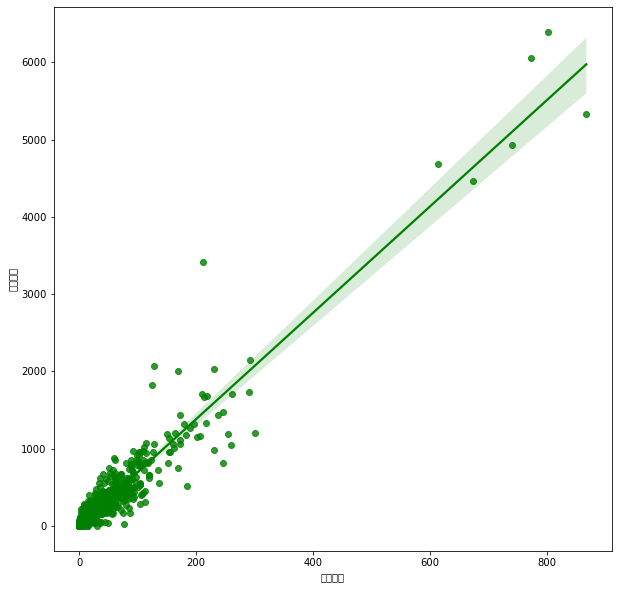

In [20]:
fig=plt.figure(figsize=(10,10))
sns.regplot(x=suspect_Old_DF['발생건수'], y=victim_Old_DF['발생건수'], fit_reg=True, color='g')

In [26]:
from scipy import stats

In [27]:
print(stats.pearsonr(suspect_Old_DF['발생건수'], victim_Old_DF['발생건수']))

(0.9612066106890517, 0.0)
